In [13]:
import numpy as np
import pandas as pd

In [15]:
df=pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [17]:
df=df.drop(columns="Cabin")

In [19]:
df=df.drop(columns="PassengerId")
df=df.drop(columns="Name")

In [21]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
df["Age"]=si.fit_transform(df[["Age"]])
df["Fare"]=si.fit_transform(df[["Fare"]])

In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [35]:
df=df.drop(columns="Ticket")

In [37]:
df=pd.get_dummies(df,columns=["Pclass","Sex","Embarked"])

In [39]:
x=df.drop(columns="Survived")
y=df["Survived"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred=knn.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7619047619047619

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df["Age"].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

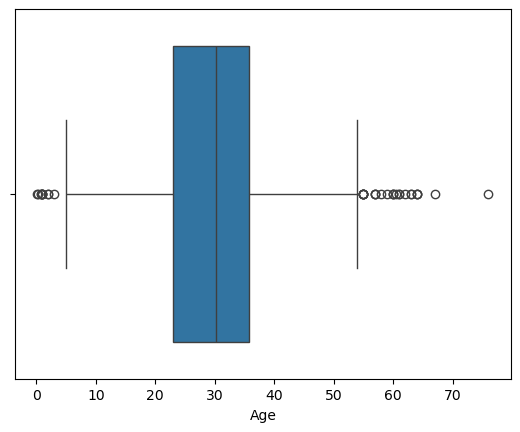

In [65]:
sns.boxplot(x=df["Age"])

In [69]:
percentile25 = df['Age'].quantile (0.25)

percentile75 = df['Age'].quantile(0.75)

In [71]:
percentile25

23.0

In [73]:
percentile75

35.75

In [75]:
IQR=percentile75-percentile25

In [77]:
upper_limit=percentile75+1.5*IQR
upper_limit

54.875

In [79]:
lower_limit=percentile25-1.5*IQR
lower_limit

3.875

In [81]:
df[df["Age"] < lower_limit]

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
89,0,2.00,1,1,23.0000,False,True,False,False,True,False,False,True
117,1,1.00,1,1,16.7000,False,False,True,True,False,False,False,True
201,0,0.33,0,2,14.4000,False,False,True,False,True,False,False,True
250,1,0.92,1,2,27.7500,False,True,False,True,False,False,False,True
263,1,1.00,1,1,12.1833,False,False,True,True,False,False,False,True
281,0,0.75,1,1,13.7750,False,False,True,False,True,False,False,True
284,1,2.00,1,1,20.2125,False,False,True,True,False,False,False,True
296,1,1.00,1,2,41.5792,False,True,False,True,False,True,False,False
307,0,0.83,0,1,9.3500,False,False,True,False,True,False,False,True
354,1,0.17,1,2,20.5750,False,False,True,True,False,False,False,True


In [85]:
newdf=df[df["Age"] < upper_limit]

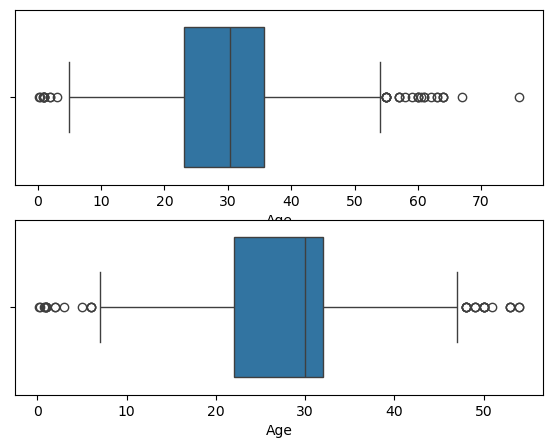

In [89]:
plt.figure(figsize = (15,5))

plt.subplot(222)

sns.boxplot(x = df['Age'])

plt.subplot(224)

sns.boxplot(x = newdf['Age'])

plt.show()

In [91]:
new_df_cap=df.copy()

In [95]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,

    np.where(
    new_df_cap['Age'] < lower_limit,
    lower_limit,
    new_df_cap["Age"])

)

In [97]:
new_df_cap.shape

(418, 13)

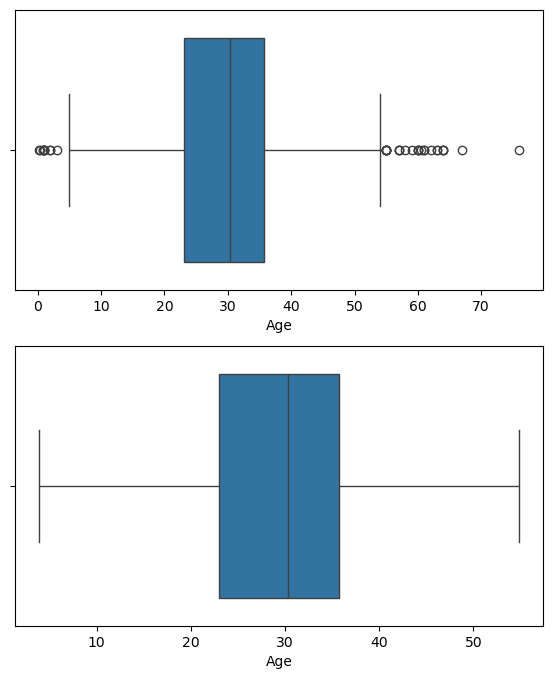

In [101]:
plt.figure(figsize = (15,8))

plt.subplot(222)

sns.boxplot(x=df ['Age'])

plt.subplot(224)

sns.boxplot(x=new_df_cap['Age'])

plt.show()